In [11]:
import keras
import tensorflow as tf
from keras.layers import Input, Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.utils import to_categorical

import numpy as np
import pandas as pd

import plotly.express as px
import plotly.io as pio
pio.templates.default = 'plotly_dark'

import matplotlib.pyplot as plt

from PIL import Image

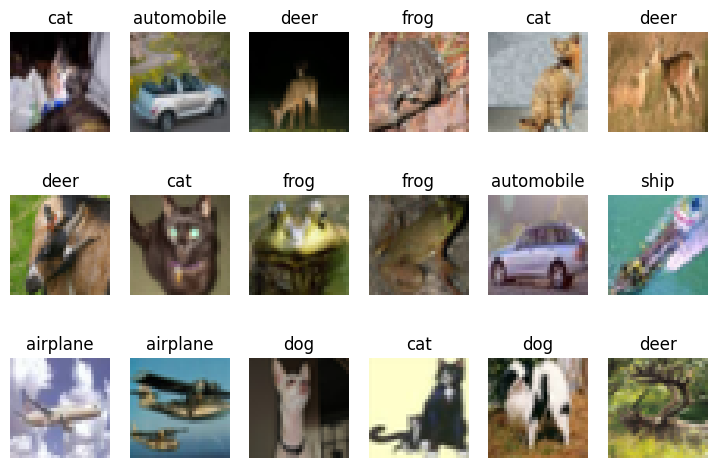

Single image size: 32 x 32
Number of channels: 3


In [12]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

cifar10_classes = {
    0: 'airplane', 
    1: 'automobile', 
    2: 'bird', 
    3: 'cat', 
    4: 'deer', 
    5: 'dog', 
    6: 'frog', 
    7: 'horse', 
    8: 'ship', 
    9: 'truck'
}

cols, rows = 6, 3
fig = plt.figure(figsize=(1.5 * cols, 2 * rows))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

w, h, c = X_train[0].shape
print(f"Single image size: {w} x {h}\nNumber of channels: {c}")

In [13]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [14]:
max_val = X_train.max()
X_train_norm = X_train / max_val
X_test_norm = X_test / max_val

In [17]:
model = Sequential([
    Input((w, h, c)),
    Conv2D(filters=16, kernel_size=3, padding='same'),
    Conv2D(filters=32, kernel_size=3, padding='same'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.25),
    Conv2D(filters=32, kernel_size=3, padding='same'),
    Conv2D(filters=64, kernel_size=3, padding='same'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.25),
    Conv2D(filters=128, kernel_size=3, padding='same'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='elu'),
    Dropout(0.5),
    Dense(128, activation='elu'),
    Dropout(0.5),
    Dense(64, activation='elu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,034 (2.57 MB)

 Trainable params: 673,034 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
BATCH_SIZE = 256
EPOCHS = 10

with tf.device("/GPU:0"):
    history = model.fit(X_train_norm, y_train_cat, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test_norm, y_test_cat))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.6287 - loss: 1.0772 - val_accuracy: 0.6995 - val_loss: 0.8587
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.6448 - loss: 1.0274 - val_accuracy: 0.6860 - val_loss: 0.9079
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.6521 - loss: 1.0047 - val_accuracy: 0.7113 - val_loss: 0.8377
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.6673 - loss: 0.9708 - val_accuracy: 0.7166 - val_loss: 0.8181
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.6727 - loss: 0.9648 - val_accuracy: 0.7198 - val_loss: 0.8053
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.6890 - loss: 0.9259 - val_accuracy: 0.7142 - val_loss: 0.8190
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.6927 - loss: 0.9149 - val_accuracy: 0.7156 - val_loss: 0.8247
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.6977 - loss: 0.8987 - val_acc

In [ ]:
loss_history = pd.DataFrame({
    'train': history.history['loss'],
    'test': history.history['val_loss']
})
px.line(loss_history, title='Loss')

In [ ]:
accuracy_history = pd.DataFrame({
    'train': history.history['accuracy'],
    'test':  history.history['val_accuracy']
})
px.line(accuracy_history, title='Accuracy')

In [ ]:
y_pred = np.argmax(model.predict(X_test_norm), axis=1)

cols, rows = 6, 3
fig = plt.figure(figsize=(1.5 * cols, 2 * rows))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_pred))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_test[random_index, :])
        ax.set_title(cifar10_classes[y_pred[random_index]])
plt.show()